In [26]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("alexandrepetit881234/fake-bills")
path = path + "/fake_bills.csv"
#Carga del dataset, tenía un error, la separación del encabezado era con ; y lo interpretaba como una columna. Suprimí eso cargándolo en hojas de google.
df = pd.read_csv(path)
df.head()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [27]:
#Conociendo el dataset
print(df.describe())
print(df.info())




          diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dty

In [28]:
#Total de valores únicos por columna
print(df.nunique())

print("\n")
#Valores únicos en todo el dataframe
print("Valores únicos en todo el dataframe",pd.unique(df.values.ravel()).size)


is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64


Valores únicos en todo el dataframe 1039


In [29]:
#total de valores nulos
print(df.isnull().sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [30]:
#Elimino esas 37 filas de nulos, que no causa un gran impacto en un dataframe de 1500 filas
df_copia = df.copy()

df_copia = df_copia.dropna()

print (df_copia.info()) #Para ver que efectivamente se realizaron los cambios.


<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB
None


## Transformaciones del dataset

In [31]:
# Separamos el conjunto de datos 60% train set, 40% test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_copia, test_size=0.4, random_state=42)
#Divido el test set en test y validation al 50%
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

train_set.info()
test_set.info()
val_set.info()

print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))


<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 453 to 1157
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    877 non-null    bool   
 1   diagonal      877 non-null    float64
 2   height_left   877 non-null    float64
 3   height_right  877 non-null    float64
 4   margin_low    877 non-null    float64
 5   margin_up     877 non-null    float64
 6   length        877 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 48.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 297 to 628
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    293 non-null    bool   
 1   diagonal      293 non-null    float64
 2   height_left   293 non-null    float64
 3   height_right  293 non-null    float64
 4   margin_low    293 non-null    float64
 5   margin_up     293 non-null    float64
 6   length     

In [32]:
#Transformaciones necesarias en los atributos, de momento solo en los de entrenamiento. Dejo una función preparada.
from sklearn.preprocessing import MinMaxScaler



#Pasar a numérico el is_genuine y el resto normalizarlos
def transforma_a_numerico(dataframe):
    dataframe["is_genuine"] = dataframe["is_genuine"].astype(int)

print(train_set.head(5))
transforma_a_numerico(train_set)
transforma_a_numerico(val_set)
print(train_set.head(5)) #True es 1 y False es 0


#Normalizo el resto de columnas, con una función para usar en el resto si es necesario


def normaliza_columnas_numericas(dataframe):
    scaler = MinMaxScaler()
    columnas_numericas = dataframe.select_dtypes(include=["number"]).columns
    columnas_numericas = columnas_numericas.drop("is_genuine")  
    dataframe[columnas_numericas] = scaler.fit_transform(dataframe[columnas_numericas])
    return dataframe

print("Antes de la normalización: ----------------------") 
print(train_set)
train_set = normaliza_columnas_numericas(train_set)
val_set = normaliza_columnas_numericas(val_set)
print("Después de la normalización: ----------------------") 
print(train_set)

    

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
453         True    172.54       104.05        103.78        4.34       2.93   
326         True    171.42       103.47        103.82        4.35       3.05   
1075       False    172.02       104.51        103.69        6.23       3.39   
776         True    171.26       103.87        104.41        4.43       2.88   
434         True    172.04       103.82        103.99        3.88       3.14   

      length  
453   114.14  
326   112.70  
1075  112.35  
776   113.90  
434   113.23  
      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
453            1    172.54       104.05        103.78        4.34       2.93   
326            1    171.42       103.47        103.82        4.35       3.05   
1075           0    172.02       104.51        103.69        6.23       3.39   
776            1    171.26       103.87        104.41        4.43       2.88   
434            1    172.04   

# ENTRENAMIENTO

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="newton-cg", max_iter=1000)

x_train = train_set.drop(columns=["is_genuine"])
y_train = train_set["is_genuine"]

clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [89]:
import random

# Selección aleatoria de un ID del conjunto de validación
random_id = random.choice(val_set.index)

# Realizar la predicción con el modelo, asegurándote de que la columna "is_genuine" se elimine correctamente
y_pred = clf.predict(val_set.loc[[random_id]].drop(columns=["is_genuine"]))

# Mostrar los resultados
print(f"ID seleccionado: {random_id}")
print(f"Predicción esperada: {val_set.loc[random_id, 'is_genuine']}")
print(f"Predicción: {y_pred[0]}")


ID seleccionado: 1390
Predicción esperada: 0
Predicción: 0


# Evaluación de resultados

Dimensiones de y_true (val_set['is_genuine']): (293,)
Dimensiones de y_pred: (293,)


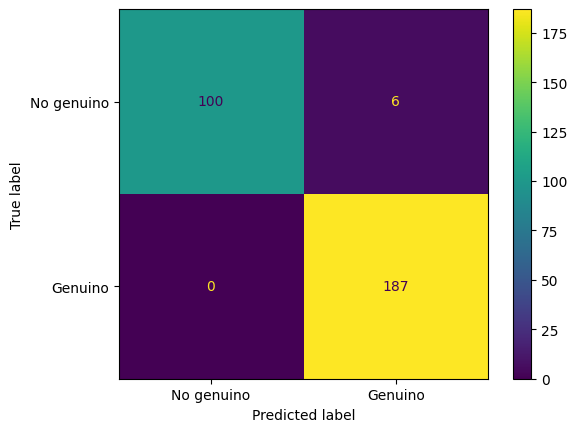

In [90]:
# Predicción para todo el conjunto de validación
y_pred = clf.predict(val_set.drop(columns=["is_genuine"]))

# Crear la matriz de confusión
cm = confusion_matrix(val_set["is_genuine"], y_pred)
print(f"Dimensiones de y_true (val_set['is_genuine']): {val_set['is_genuine'].shape}")
print(f"Dimensiones de y_pred: {y_pred.shape}")
# Visualizar la matriz de confusión
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No genuino", "Genuino"]).plot(values_format='d')

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# El reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(val_set["is_genuine"], y_pred, target_names=["No genuino", "Genuino"]))

# La precisión
accuracy = accuracy_score(val_set["is_genuine"], y_pred)
print(f"Precisión: {accuracy:.2f}")

# La curva ROC
auc = roc_auc_score(val_set["is_genuine"], y_pred)
print(f"Área bajo la curva ROC (AUC): {auc:.2f}")

Reporte de clasificación:
              precision    recall  f1-score   support

  No genuino       1.00      0.94      0.97       106
     Genuino       0.97      1.00      0.98       187

    accuracy                           0.98       293
   macro avg       0.98      0.97      0.98       293
weighted avg       0.98      0.98      0.98       293

Precisión: 0.98
Área bajo la curva ROC (AUC): 0.97
